In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
demo = pd.read_csv('county_facts.csv')
pri = pd.read_csv('primary_results.csv')

In [3]:
demo = demo[['fips','area_name','state_abbreviation','PST045214','RHI225214',
                             'RHI725214','RHI325214','RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210',
                             'VET605213','HSD410213','NES010213','SBO315207','SBO215207','SBO415207','SBO015207','INC910213',
                             'BZA110213','RHI425214']]
demo.rename(columns={'PST045214': 'Population','RHI225214':'Black','RHI725214':'Latino','RHI325214':'AmericanIndian',
                            'RHI825214':'White','EDU635213':'HighSchool','EDU685213':'Bachelors',
                             'INC110213':'MediHouseInc','PVY020213':'Kurang Mampu','POP060210':'Density','VET605213':'Veteran',
                            'HSD410213':'Rumah Tangga','NES010213':'Pengangguran','SBO315207':'BlackownFirm','SBO215207':'AsianowmFirm',
                            'SBO415207':'LatinoownFirm','SBO015207':'WomenownFirm','INC910213':'incomepercapita',
                            'BZA110213':'Privatenonfarmemployment','RHI425214':'Asian'}, inplace=True)
demo.head()

,fips,area_name,state_abbreviation,Population,Black,Latino,AmericanIndian,White,HighSchool,Bachelors,...,Veteran,Rumah Tangga,Pengangguran,BlackownFirm,AsianowmFirm,LatinoownFirm,WomenownFirm,incomepercapita,Privatenonfarmemployment,Asian
0,0,United States,NaN,318857056,13.2,17.4,1.2,62.1,86.0,28.8,...,21263779,115610216,23005620,7.1,5.7,8.3,28.8,28155,118266253,5.4
1,1000,Alabama,NaN,4849377,26.7,4.1,0.7,66.2,83.1,22.6,...,388865,1838683,311578,14.8,1.8,1.2,28.1,23680,1603100,1.3
2,1001,Autauga County,AL,55395,18.7,2.7,0.5,75.6,85.6,20.9,...,5922,20071,2947,15.2,1.3,0.7,31.7,24571,10120,1.1
3,1003,Baldwin County,AL,200111,9.6,4.6,0.7,83.0,89.1,27.7,...,19346,73283,16508,2.7,1.0,1.3,27.3,26766,54988,0.9
4,1005,Barbour County,AL,26887,47.6,4.5,0.6,46.6,73.7,13.4,...,2120,9200,1546,0.0,0.0,0.0,27.0,16829,6611,0.5


In [4]:
#Reading Results CSV File
results = pd.read_csv('primary_results.csv')
results = results[results.party == "Republican"]
# results = results[(results.state != "Maine") & (results.state != "Massachusetts") & (results.state != "Vermont") & (results.state != "Illinois") ]
# results = results[(results.candidate != 'No Preference') & (results.candidate != ' Uncommitted')]
results = results[(results.candidate == "Donald Trump") | (results.candidate != "Donald Trump") ]
Rep = results
Rep.candidate.unique()

array(['Ben Carson', 'Donald Trump', 'John Kasich', 'Marco Rubio',
       'Ted Cruz', 'Carly Fiorina', 'Chris Christie', 'Jeb Bush',
       'Mike Huckabee', 'Rand Paul', 'Rick Santorum'], dtype=object)

In [5]:
#Calculating statewise total votes and fraction votes (Republic)
votesByState = [[candidate, state, party] for candidate in Rep.candidate.unique() for state in Rep.state.unique() 
                for party in Rep.party.unique()]
for i in votesByState:
    i.append(Rep[(Rep.candidate == i[0]) & (Rep.state == i[1])].votes.sum())
    i.append(i[3]*1.0/Rep[Rep.state == i[1]].votes.sum())
vbsRep = pd.DataFrame(votesByState, columns = ['candidate', 'state', 'party', 'votes','partyFrac'])

In [6]:
# allData = pd.merge(vbs, demo, how="inner", left_on = 'state',right_on = 'area_name')
# # allData.corr()['partyFrac']
# # allData.dropna()
# # allData.area_name.unique()
# allData

In [7]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# allData['state1']= le.fit_transform (allData['state'])
# allData.head()

In [10]:
# demo['state1']= le.fit_transform (demo['area_name'])
# demo.head()

In [8]:
#Merging demographics and results
allDataRep = pd.merge(vbsRep, demo, how="inner", left_on = 'state',right_on = 'area_name')
allDataRep.drop('state_abbreviation',axis=1, inplace=True)
allDataRep.head()
# #Segregate data candidate wise
DNT = allDataRep[(allDataRep.candidate == "Donald Trump")] #| (allData.candidate != "Donald Trump")]
DNT = DNT.reset_index();
DNT.drop('index',axis=1, inplace=True)


In [9]:
TED = allDataRep[(allDataRep.candidate == "Ted Cruz")] 
TED = TED.reset_index();
TED.drop('index',axis=1, inplace=True)

In [10]:
#Select X for Prediction
feature_cols = ['Population','Black','Latino','White','HighSchool','Bachelors','MediHouseInc','Kurang Mampu','Density',
                'Veteran','Rumah Tangga','Pengangguran','AsianowmFirm','LatinoownFirm','WomenownFirm','incomepercapita',
                'Privatenonfarmemployment','Asian']
X = DNT[feature_cols]

#Select y for Prediction
y = DNT.partyFrac


In [19]:
A = TED[feature_cols]
b = TED['partyFrac']

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

## Model

In [13]:
RFR = RandomForestRegressor(n_estimators=10000)
RID = Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=200000,
      normalize=False, random_state=None, solver='auto', tol=0.001)
LASS = Lasso(max_iter=100000)
ELA = ElasticNet(max_iter=100000)
LIN = LinearRegression()

#train model Trump
RFR.fit(X,y)
RID.fit(X,y)
LASS.fit(X,y)
ELA.fit(X,y)
LIN.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#train model Ted
RFR1 = RandomForestRegressor(n_estimators=10000)
RID1 = Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='auto', tol=0.001)
LASS1 = Lasso(max_iter=10000)
ELA1 = ElasticNet(max_iter=10000)
LIN1= LinearRegression()

RFR1.fit(A,b)
RID1.fit(A,b)
LASS1.fit(A,b)
ELA1.fit(A,b)
LIN1.fit(A,b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
from numpy.polynomial.polynomial import polyfit

Text(0.5, 1.0, 'Linear Regression')

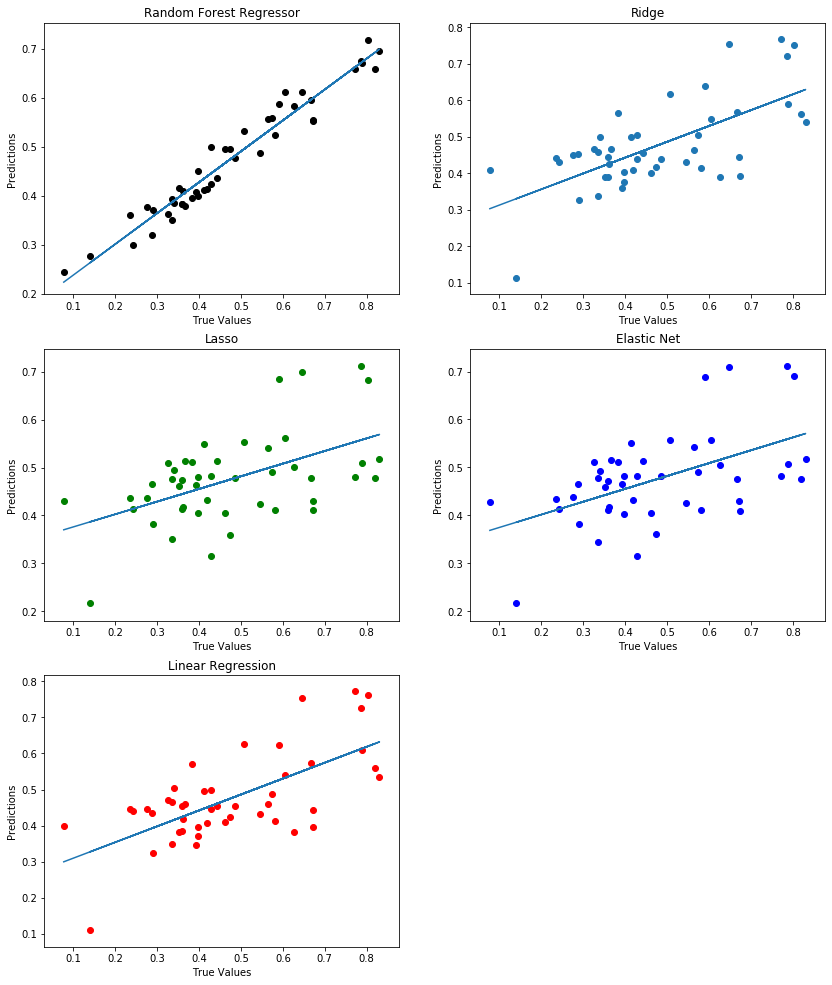

In [16]:
# Perbandingan Tiap Model
plt.figure(figsize=(14,17))

plt.subplot(321)
p = RFR.predict(X)
plt.scatter(y, p,c='black')
b, m = polyfit(y, p, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor')

plt.subplot(322)
pp = RID.predict(X)
plt.scatter(y, pp,c='#1f77b4')
b, m = polyfit(y, pp, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge')


plt.subplot(323)
ppp = LASS.predict(X)
plt.scatter(y, ppp,c='g')
b, m = polyfit(y, ppp, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso')


plt.subplot(324)
pppp = ELA.predict(X)
plt.scatter(y, pppp,c='b')
b, m = polyfit(y, pppp, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Elastic Net')


plt.subplot(325)
ppppp = LIN.predict(X)
plt.scatter(y, ppppp,c = 'r')
b, m = polyfit(y, ppppp, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')



-------------------------------------------------

In [17]:
print('Train accuracy score Trump')
print('--------------------------')
print('RandomForestRegressor:',RFR.score(X,y))
print('Ridge :',RID.score(X,y))
print('Lasso: ',LASS.score(X,y))
print('Elastic Net : ',ELA.score(X,y))
print('Linear Regression: ',LIN.score(X,y))
  

Train accuracy score Trump
--------------------------
RandomForestRegressor: 0.84288573274129
Ridge : 0.43926415102645094
Lasso:  0.2716069245194762
Elastic Net :  0.2721757746373965
Linear Regression:  0.4413606341728499


In [21]:
print('Train accuracy score Ted')
print('--------------------------')
print('RandomForestRegressor:',RFR1.score(A,b))
print('Ridge :',RID1.score(A,b))
print('Lasso: ',LASS1.score(A,b))
print('Elastic Net : ',ELA1.score(A,b))
print('Linear Regression: ',LIN1.score(A,b))

Train accuracy score Ted
--------------------------
RandomForestRegressor: 0.859569136942782
Ridge : 0.5615173660176089
Lasso:  0.43795775966173356
Elastic Net :  0.4387961095522078
Linear Regression:  0.5639681479841769


------------------------------------------------------------

In [22]:
#test model
#Negara bagian yang memiliki value Trump sebagai  pembanding 

demo1=demo[(demo.area_name=='Alaska')]
demo2=demo[(demo.area_name=='Connecticut')]
demo3=demo[(demo.area_name=='Maryland')]
demo4=demo[(demo.area_name=='Alabama')]
demo5=demo[(demo.area_name=='New York')]
demo6=demo[(demo.area_name=='Pennsylvania')]
demo7=demo[(demo.area_name=='Florida')]
demo8=demo[(demo.area_name=='Georgia')]
demo9=demo[(demo.area_name=='Wisconsin')]
demo10=demo[(demo.area_name=='Oklahoma')]
demo11=demo[(demo.area_name=='Nevada')]
demo12=demo[(demo.area_name=='Missouri')]
demo13=demo[(demo.area_name=='Michigan')]


## Random Forest Regressor

In [23]:
X_test1=demo1[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.array(y_pred4);

X_test1=demo2[feature_cols]
y_pred4=RFR.predict(X_test1)
xx = np.append(xx, y_pred4[0]);

X_test1=demo3[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo4[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo5[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo6[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo7[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo8[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo9[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo10[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo11[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);


X_test1=demo12[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo13[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

In [37]:
a = TED[(TED.state == 'Idaho')]
a = a['partyFrac'].mean()
a

0.46887831887181586

             Predicted   Real
Arizona       0.303445  0.303
Idaho         0.408552  0.468
Maryland      0.191324  0.190
Arizona       0.303445  0.290
Mississippi   0.332826  0.371


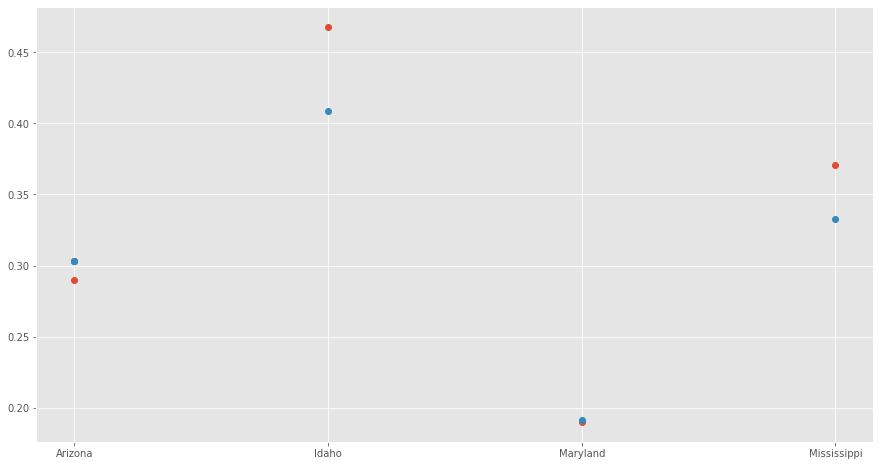

In [24]:
demo1=demo[(demo.area_name=='Arizona')]
demo2=demo[(demo.area_name=='Idaho')]
demo3=demo[(demo.area_name=='Maryland')]
demo4=demo[(demo.area_name=='Arizona')]
demo5=demo[(demo.area_name=='Mississippi')]

X_test1=demo1[feature_cols]
y_pred4=RFR1.predict(X_test1)
xxted=np.array(y_pred4);

X_test1=demo2[feature_cols]
y_pred4=RFR1.predict(X_test1)
xxted = np.append(xxted, y_pred4[0]);

X_test1=demo3[feature_cols]
y_pred4=RFR1.predict(X_test1)
xxted=np.append(xxted, y_pred4[0]);

X_test1=demo4[feature_cols]
y_pred4=RFR1.predict(X_test1)
xxted=np.append(xxted, y_pred4[0]);

X_test1=demo5[feature_cols]
y_pred4=RFR1.predict(X_test1)
xxted=np.append(xxted, y_pred4[0]);

predted =pd.Series(xxted, index=['Arizona','Idaho','Maryland','Arizona','Mississippi']) 
xted = np.array([.303,.468,.19,.29,.371])
realted = pd.Series(xted, index=['Arizona','Idaho','Maryland','Arizona','Mississippi'])

eted = {'Predicted' : predted,'Real' : realted}
finalted=pd.DataFrame(eted)
print(finalted)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(realted,'o')
plt.plot(predted,'o')
plt.show()

In [162]:
a = TED[(TED.state == 'New Mexico')]
a = a['partyFrac'].mean()
a

0.14518246258860593

In [25]:
pred =pd.Series(xx, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia',
                           'Wisconsin','Oklahoma','Nevada','Missouri','Michigan']) 
x1 = np.array([.33,.59,.565,.443,.604,.580,.473,.393,.360,.287,.461,.418,.384])
real = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia',
                            'Wisconsin','Oklahoma','Nevada','Missouri','Michigan'])

              Predicted   Real
Alaska         0.393599  0.330
Connecticut    0.586866  0.590
Maryland       0.556387  0.565
Alabama        0.436121  0.443
New York       0.611534  0.604
Pennsylvania   0.523513  0.580
Florida        0.494437  0.473
Georgia        0.407779  0.393
Wisconsin      0.382857  0.360
Oklahoma       0.319186  0.287
Nevada         0.495154  0.461
Missouri       0.413420  0.418
Michigan       0.395906  0.384


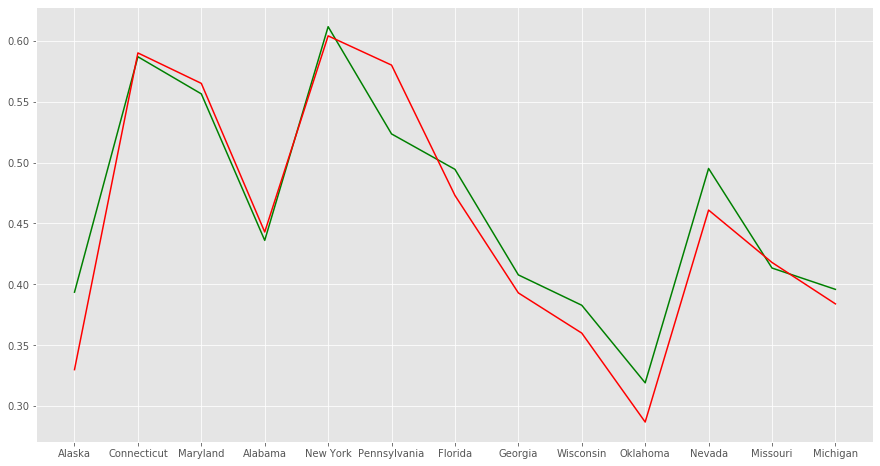

In [26]:
e = {'Predicted' : pred,'Real' : real}
final=pd.DataFrame(e)
print(final)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred,'g')  # Pred
plt.plot(real,'r') # Real
plt.show()

In [82]:
# print(np.sqrt(mean_squared_error(a,b)))
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score


print(f'MAX ERROR RFR : {(round(max_error(pred,real),3))}')
print(f'MSE RFR : {(round(mse(pred,real),3))} ')
print(f'RMSE RFR: {(round(np.sqrt(mse(pred,real)),3))} ')
print(f'MAE RFR: {(round(mae(pred,real),3))} ')
print(f'R2 Score RFR : {(round(r2_score(pred,real),2))} ')

MAX ERROR RFR : 0.064
MSE RFR : 0.001 
RMSE RFR: 0.029 
MAE RFR: 0.022 
R2 Score RFR : 0.88 


In [83]:
# print(np.sqrt(mean_squared_error(a,b)))
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score

print(f'MAX ERROR RFR : {(round(max_error(predted,realted),3))}')
print(f'MSE RFR : {(round(mse(predted,realted),3))} ')
print(f'RMSE RFR: {(round(np.sqrt(mse(predted,realted)),3))} ')
print(f'MAE RFR: {(round(mae(predted,realted),3))} ')
print(f'R2 Score RFR : {(round(r2_score(predted,realted),2))} ')

MAX ERROR RFR : 0.059
MSE RFR : 0.001 
RMSE RFR: 0.032 
MAE RFR: 0.023 
R2 Score RFR : 0.79 


# Prediksi Negara bagian yang belum memiliki value


In [49]:
a = DNT[(DNT.state == 'Colorado')]
a = a['partyFrac'].mean()
a

nan

In [50]:
demo11=demo[(demo.area_name=='Colorado')]
demo22=demo[(demo.area_name=='Maine')]
demo33=demo[(demo.area_name=='North Dakota')]

In [51]:
X_test11=demo11[feature_cols]
y_pred44=RFR.predict(X_test11)
xxtes=np.array(y_pred44);

X_test11=demo22[feature_cols]
y_pred44=RFR.predict(X_test11)
xxtes = np.append(xxtes, y_pred44[0]);

X_test11=demo33[feature_cols]
y_pred44=RFR.predict(X_test11)
xxtes=np.append(xxtes, y_pred44[0]);

In [52]:
predtes =pd.Series(xxtes, index=['Colorado','Maine','North Dakota']) 
# x1 = np.array([.3,.325,.565])
# real = pd.Series(x1, index=['Colorado','Maine','North Dakota'])

              Predicted
Colorado       0.552301
Maine          0.420871
North Dakota   0.406527


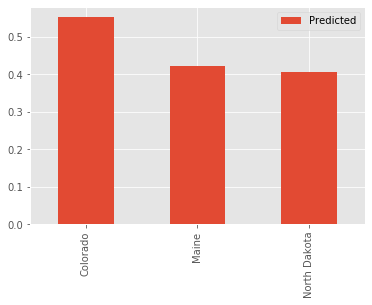

In [53]:
ee1 = {'Predicted' : predtes}
finall=pd.DataFrame(ee1)
print(finall)
finall.plot.bar()

# Model Lasso

In [54]:
X_test2=demo1[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.array(y_pred2);

X_test2=demo2[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo3[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo4[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo5[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo6[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.array(y_pred2);

X_test2=demo7[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo8[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo9[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo10[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo11[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo12[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo13[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);


In [55]:
a = DNT[(DNT.state == 'New York')]
a = a['partyFrac'].mean()
a

0.6040734786596347

In [56]:
pred2 =pd.Series(xx2, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia'])
x1 = np.array([.33,.59,.565,.443,.604,.580,.473,.393])
real2 = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia'])

              Predicted   Real
Alaska         0.410999  0.330
Connecticut    0.359908  0.590
Maryland       0.464200  0.565
Alabama        0.413225  0.443
New York       0.466244  0.604
Pennsylvania   0.434619  0.580
Florida        0.433033  0.473
Georgia        0.512439  0.393


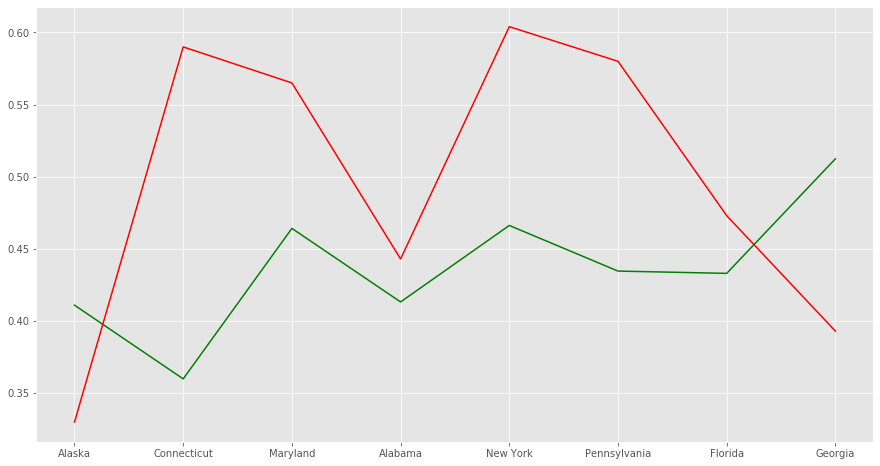

In [57]:
f = {'Predicted' : pred2,'Real' : real2}
final2=pd.DataFrame(f)
print(final2)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred2,'g')  # Pred
plt.plot(real2,'r') # Real
plt.show()


In [86]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score

print(f'MAX ERROR LASSO : {(round(max_error(pred2,real2),3))}')
print(f'MSE LASSO : {(round(mse(pred2,real2),3))} ')
print(f'RMSE LASSO: {(round(np.sqrt(mse(pred2,real2)),3))} ')
print(f'MAE LASSO: {(round(mae(pred2,real2),3))} ')
print(f'R2 Score LASSO : {(round(r2_score(pred2,real2),2))} ')

MAX ERROR LASSO : 0.23
MSE LASSO : 0.016 
RMSE LASSO: 0.126 
MAE LASSO: 0.111 
R2 Score LASSO : -7.73 


# Model RIDGE

In [59]:
X_test3=demo1[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.array(y_pred3);

X_test3=demo2[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo3[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo4[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo5[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo6[feature_cols]
y_pred3=RID.predict(X_test2)
xx3=np.append(xx3,y_pred2);

X_test3=demo7[feature_cols]
y_pred3=RID.predict(X_test2)
xx3=np.append(xx3, y_pred2[0]);

X_test3=demo8[feature_cols]
y_pred3=RID.predict(X_test2)
xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo9[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo10[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo11[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo12[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo13[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

In [60]:
pred3 =pd.Series(xx3, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia']) 
x2 = np.array([.33,.59,.565,.443,.604,.580,.473,.393])
real3 = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia'])

              Predicted   Real
Alaska         0.504484  0.330
Connecticut    0.328081  0.590
Maryland       0.464329  0.565
Alabama        0.504484  0.443
New York       0.440099  0.604
Pennsylvania   0.512439  0.580
Florida        0.512439  0.473
Georgia        0.512439  0.393


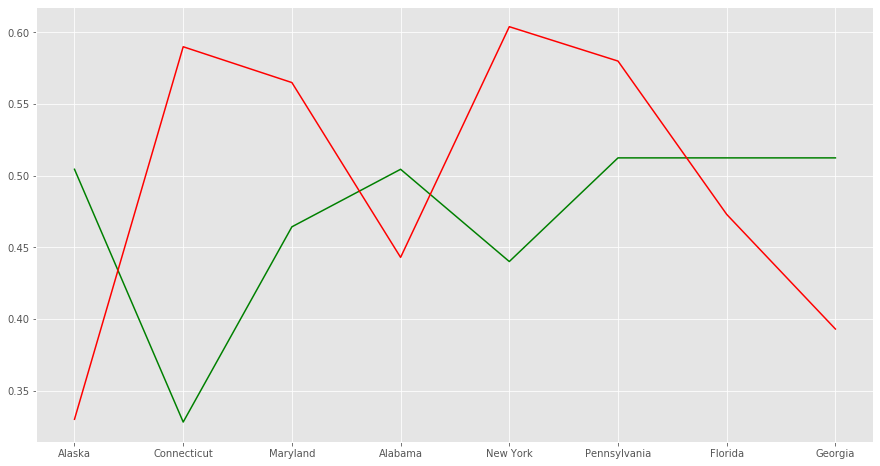

In [61]:
g = {'Predicted' :pred3,'Real' :real3}
final3=pd.DataFrame(g)
print(final3)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred3,'g')  # Pred
plt.plot(real3,'r') # Real
plt.show()


In [85]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score

print(f'MAX ERROR RIDGE : {(round(max_error(pred3,real3),3))}')
print(f'MSE RIDGE : {(round(mse(pred3,real3),3))} ')
print(f'RMSE RIDGE: {(round(np.sqrt(mse(pred3,real3)),3))} ')
print(f'MAE RIDGE: {(round(mae(pred3,real3),3))} ')
print(f'R2 Score RIDGE : {(round(r2_score(pred3,real3),2))} ')

MAX ERROR RIDGE : 0.262
MSE RIDGE : 0.02 
RMSE RIDGE: 0.142 
MAE RIDGE: 0.124 
R2 Score RIDGE : -4.56 


----------------------------------------------------------------------------

In [64]:
print ("Future Pedictions - Donald Trump")

#Select Future States 
#Change name of state for other states
demo20=demo[(demo.area_name=='Arkansas')]
demo21=demo[(demo.area_name=='New Hampshire')]
demo22=demo[(demo.area_name=='Texas')]
demo23=demo[(demo.area_name=='Arizona')]
demo24=demo[(demo.area_name=='North Carolina')]
demo25=demo[(demo.area_name=='Ohio')]
demo26=demo[(demo.area_name=='New Mexico')]
demo27=demo[(demo.area_name=='Oregon')]


X_test1=demo20[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Arkansas = {((y_pred4[0])*100)} %')
xxy=np.array(y_pred4);


X_test1=demo21[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'New Hampshire = {((y_pred4[0])*100)} %')
xxy=np.append(xxy,y_pred4);

X_test1=demo22[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Texas = {((y_pred4[0])*100)} %')
xxy=np.append(xxy,y_pred4);


X_test1=demo23[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Arizona = {((y_pred4[0])*100)} %')
xxy=np.append(xxy,y_pred4);

X_test1=demo24[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'North Carolina = {((y_pred4[0])*100)} %')
xxy=np.append(xxy,y_pred4);

X_test1=demo25[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Ohio = {((y_pred4[0])*100)} %')
xxy=np.append(xxy,y_pred4);

X_test1=demo26[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'New Mexico = {((y_pred4[0])*100)} %')
xxy=np.append(xxy,y_pred4);

X_test1=demo27[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Oregon = {((y_pred4[0])*100)} %')
xxy=np.append(xxy,y_pred4);


Future Pedictions - Donald Trump
Arkansas = 35.059954031547804 %
New Hampshire = 38.314346371674674 %
Texas = 37.78265113906983 %
Arizona = 55.93752922403259 %
North Carolina = 41.163733355581606 %
Ohio = 40.8827217131523 %
New Mexico = 65.90354128994443 %
Oregon = 59.480934852620514 %


In [65]:
predtes1 =pd.Series(xxy, index=['Arkansas','New Hampshire','Texas','Arizona','North Carolina','Ohio','New Mexico','Oregon']) 
ee2 = {'Predicted' :predtes1}


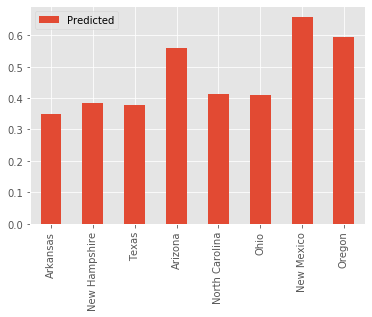

In [66]:
finall1=pd.DataFrame(ee2)
finall1.plot.bar()

In [ ]:
a = DNT[(DNT.state == 'Oregon')]
a = a['partyFrac'].mean()
a